##**Proyek Analisis Data: E-Commerce Public Dataset**

Nama        : Putra Andika Pradana


Email       : putra.andika.pradana-2020@feb.unair.ac.id


ID Dicoding : puth88

##**Menentukan Pertanyaan Bisnis**
1. Dimana letak bagian negara dengan jumlah customer terbanyak?

2. Bagaimana kinerja sales dari E-commerce tersebut?

3. Bagaimana review customer terhadap kinerja pelayanan e-commerce tersebut?



#**Menyiapkan Semua Library yang Dibutuhkan**

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.image as mimg
import urllib
import unidecode

#**Data Wrangling**

###**Gathering Data**

*Load Customers Dataset*




In [ ]:
customer_dataset_df = pd.read_csv('/content/drive/MyDrive/DataSet/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv')
customer_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


*Load Geo Location Dataset*

In [ ]:
geolokasi_df = pd.read_csv('/content/drive/MyDrive/DataSet/E-commerce-public-dataset/E-Commerce Public Dataset/geolocation_dataset.csv')
geolokasi_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


*Load Order Items Dataset*

In [ ]:
order_items_df = pd.read_csv('/content/drive/MyDrive/DataSet/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


*Load Order Payments Dataset*

In [ ]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/DataSet/E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


*Load Order Reviews Dataset*

In [ ]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/DataSet/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


*Load Orders Dataset*

In [ ]:
order_dataset_df = pd.read_csv('/content/drive/MyDrive/DataSet/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv')
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


*Load Product Category Datasets*

In [ ]:
product_category_df = pd.read_csv('/content/drive/MyDrive/DataSet/E-commerce-public-dataset/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


*Load Products Dataset Datasets*

In [ ]:
product_dataset_df = pd.read_csv('/content/drive/MyDrive/DataSet/E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv')
product_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


*Load Sellers Datasets*

In [ ]:
sellers_dataset_df = pd.read_csv('/content/drive/MyDrive/DataSet/E-commerce-public-dataset/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


###**Assessing Data**
*Take a look about any informations in every dataframe that I've loaded*

In [ ]:
#Check customer dataframe informations
print('\n', customer_dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None


In [ ]:
#Check Geolokasi dataframe informations
print('\n', geolokasi_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

 None


In [ ]:
#Check order items dataframe informations
print('\n', order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

 None


In [ ]:
#Check order payments dataframe informations
print('\n', order_payments_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

 None


In [ ]:
#Check order reviews dataframe informations
print('\n', order_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

 None


In [ ]:
#Check orders dataframe informations
print('\n', order_dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None


In [ ]:
#Check product category dataframe informations
print('\n', product_category_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

 None


In [ ]:
#Check products dataframe informations
print('\n', product_dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

 None


In [ ]:
#Check sellers dataframe informations
print('\n', sellers_dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

 None


*Lets check about the data null in our every dataframe*

In [ ]:
#Info data null in customers dataframe
print('\nInfo data null in customers:\n', customer_dataset_df.isnull().sum())


Info data null in customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [ ]:
#Info data null in geolocation dataframe
print('\nInfo data null in geolocation:\n', geolokasi_df.isnull().sum())


Info data null in geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [ ]:
#Info data null in order items dataframe
print('\nInfo data null in order items:\n', order_items_df.isnull().sum())


Info data null in order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [ ]:
#Info data null in order payments dataframe
print('\nInfo data null in order payments:\n', order_payments_df.isnull().sum())


Info data null in order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [ ]:
#Info data null in order reviews dataframe
print('\nInfo data null in order reviews:\n', order_reviews_df.isnull().sum())


Info data null in order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
#Info data null in orders dataframe
print('\nInfo data null in order dataset:\n', order_dataset_df.isnull().sum())


Info data null in order dataset:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
#Info data null in product category dataframe
print('\nInfo data null in product category:\n', product_category_df.isnull().sum())


Info data null in product category:
 product_category_name            0
product_category_name_english    0
dtype: int64


In [ ]:
#Info data null in product dataset dataframe
print('\nInfo data null in product dataset:\n', product_dataset_df.isnull().sum())


Info data null in product dataset:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [ ]:
#Info data null in sellers dataset dataframe
print('\nInfo data null in sellers dataset:\n', sellers_dataset_df.isnull().sum())


Info data null in sellers dataset:
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


*Let's check about data duplicate in our every dataframe*

In [ ]:
#Info data duplicate in all of our dataframes
print('Info data duplicate in customers:', customer_dataset_df.duplicated().sum())
print('Info data duplicate in geolocation:', geolokasi_df.duplicated().sum())
print('Info data duplicate in order items:', order_items_df.duplicated().sum())
print('Info data duplicate in order payments:', order_payments_df.duplicated().sum())
print('Info data duplicate in order reviews:', order_reviews_df.duplicated().sum())
print('Info data duplicate in order dataset:', order_dataset_df.duplicated().sum())
print('Info data duplicate in product category:', product_category_df.duplicated().sum())
print('Info data duplicate in product dataset:', product_dataset_df.duplicated().sum())
print('Info data duplicate in sellers dataset:', sellers_dataset_df.duplicated().sum())

Info data duplicate in customers: 0
Info data duplicate in geolocation: 261831
Info data duplicate in order items: 0
Info data duplicate in order payments: 0
Info data duplicate in order reviews: 0
Info data duplicate in order dataset: 0
Info data duplicate in product category: 0
Info data duplicate in product dataset: 0
Info data duplicate in sellers dataset: 0


*Let's check about data describe in all of our dataframe*

In [ ]:
#Info data describe in customers dataframe
print('\nData describe in customers:\n', customer_dataset_df.describe(include='all'))


Data describe in customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix 

In [ ]:
#Info data describe in geolocation dataframe
print('\nData describe in geolocation:\n', geolokasi_df.describe(include='all'))


Data describe in geolocation:
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
uni

In [ ]:
#Info data describe in order items dataframe
print('\nData describe in order items:\n', order_items_df.describe(include='all'))


Data describe in order items:
                                 order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8

In [ ]:
#Info data describe in order payments dataframe
print('\nData describe in order payments:\n', order_payments_df.describe(include='all'))


Data describe in order payments:
                                 order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_va

In [ ]:
#Info data describe in order reviews dataframe
print('\nData describe in order reviews:\n', order_reviews_df.describe(include='all'))


Data describe in order reviews:
                                review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        review_score review_c

In [ ]:
#Info data describe in orders dataframe
print('\nData describe in orders dataset:\n', order_dataset_df.describe(include='all'))


Data describe in orders dataset:
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-

In [ ]:
#Info data describe in product category dataframe
print('\nData describe in product category:\n', product_category_df.describe(include='all'))


Data describe in product category:
        product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [ ]:
#Info data describe in products dataframe
print('\nData describe in products dataset:\n', product_dataset_df.describe(include='all'))


Data describe in products dataset:
                               product_id product_category_name  \
count                              32951                 32341   
unique                             32951                    73   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32341.000000                32341.000000        32341.000000   
unique      

In [ ]:
#Info data describe in sellers dataframe
print('\nData describe in sellers:\n', sellers_dataset_df.describe(include='all'))


Data describe in sellers:
                                seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                                  NaN            32713.453830         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN             7093.500000         NaN   
50%                                  NaN            14940.000000         NaN   
75%                                  NaN            64552.500000         NaN   
max                                  NaN            99730.000000         NaN   

       sell

###**Cleaning Data**


###Info data duplicate
*Info data duplicate in geolocation: 261831*

---
###Info data null pada order_dataset_df


order_approved_at =                160


order_delivered_carrier_date =    1783


order_delivered_customer_date =   2965

---
###Info data null pada order_reviews_df



review_comment_title =       87656


review_comment_message =     58247


---
###Info data null pada product_dataset_df


product_category_name =         610


product_name_lenght =           610


product_description_lenght =    610


product_photos_qty =            610


product_weight_g =                2


product_length_cm =               2


product_height_cm =               2


product_width_cm =                2



---





In [ ]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
order_reviews_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [ ]:
order_reviews_df.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

In [ ]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [ ]:
#Mengisi data NaN dengan 'no comments' pada kolom review_comment_title dan review_comment_message
order_reviews_df.fillna(value='no comments',inplace=True)

In [ ]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no comments,no comments,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no comments,no comments,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no comments,no comments,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no comments,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no comments,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_dataset_df[order_dataset_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
datetime_orderitems = ["shipping_limit_date"]

for column in datetime_orderitems:
  order_items_df[column] = pd.to_datetime(order_items_df[column])


In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no comments,no comments,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no comments,no comments,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no comments,no comments,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no comments,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no comments,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:

datetime_orderreviews = ["review_creation_date","review_answer_timestamp"]

for column in datetime_orderreviews:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [ ]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no comments,no comments,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no comments,no comments,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no comments,no comments,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no comments,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no comments,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [ ]:
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
datetime_orderdataset = ["order_purchase_timestamp","order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date" ]

for column in datetime_orderdataset:
  order_dataset_df[column] = pd.to_datetime(order_dataset_df[column])

In [ ]:
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#**Exploratory Data Analysis(EDA)**



##Eksplor data customer_dataset_df

In [ ]:
customer_dataset_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
42879,be2e3eed1024642d2ed3d69cdd80959e,cc15a21bf6b08690ccc5d48e9b2568cf,26265,nova iguacu,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG
49596,32e9e40545eb494f5bbf1b50cd11a017,ae7064095a12f07f1c3b733a947f948d,48760,araci,BA
84876,524d1030b6d659f0aa5e03f459a89b34,0f0b49d45120fcb28bda56e94bc85673,17030,bauru,SP
75290,3357130ad85f3c9758c6623ba3d51bc4,bb07648db5b0a3cd55ca6a116f011fc4,19053,presidente prudente,SP
17466,c9cd9a4e5438dec9e84c776f42de1640,1935a32a51f3226415de9e701afeb878,13081,campinas,SP
91918,07f4efb08d07550827c630c7bbf6e72f,fb05684961656c39c375d6ad8608d579,97700,santiago,RS
71456,a841fb9010543883845d5cc513cac85f,69414ec37315f745bcafd70cf3deeb08,99925,ipiranga do sul,RS
87533,4b83b1454b3f9c1882dd891f1ac1faaa,1d5f5134509b38f0cf262b07b36ace38,4255,sao paulo,SP
38950,c9062728d2f9e245f3945d071434755d,557178c8b75b68502d9b59e09d09db8b,18071,sorocaba,SP


In [ ]:
customer_dataset_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customer_dataset_df.customer_id.is_unique

True

In [ ]:
customer_dataset_df.customer_unique_id.is_unique

False

In [ ]:
customer_dataset_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [ ]:
customer_dataset_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=True)

customer_city
lagoao                1
pedro gomes           1
caraibas              1
japoata               1
pedro velho           1
                  ...  
curitiba           1521
brasilia           2131
belo horizonte     2773
rio de janeiro     6882
sao paulo         15540
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
customer_dataset_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=True)

customer_state
RR       46
AP       68
AC       81
AM      148
RO      253
TO      280
SE      350
AL      413
RN      485
PI      495
PB      536
MS      715
MA      747
MT      907
PA      975
CE     1336
PE     1652
GO     2020
ES     2033
DF     2140
BA     3380
SC     3637
PR     5045
RS     5466
MG    11635
RJ    12852
SP    41746
Name: customer_id, dtype: int64

##**Eksplor Order_Payments_df**

In [ ]:
order_payments_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
6914,72c501775cf36e99076132aaee5ae9c0,1,boleto,1,127.02
7684,d995b179b6d42341a2642cbfc2e02367,1,boleto,1,798.68
87470,e4b5eb77d6eca2730a7ed8e9abaf4db2,1,credit_card,6,321.38
21678,57db58fa887c4205f3bf01211de5cceb,1,credit_card,2,41.16
7736,f1b2f741c002e0bf5f0f63e3b83c1a21,1,credit_card,4,191.02
20682,67b0f3d0a405fc007841f73f2792323b,1,boleto,1,23.29
41691,0ac6093ec7bb2a5eb1da4961999ee9d6,1,credit_card,1,60.37
13114,a2860430c7bee71b1b90ffc78a95df6d,1,credit_card,12,462.84
68550,a38dda1569202dafdff4060bf32c811e,2,voucher,1,30.00
13519,8f63d71ea8a3f42d0bec26ef31cab14b,1,credit_card,4,44.75


In [ ]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


##**Explore Order_dataset_df**

In [ ]:
order_dataset_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2713,a7881f54a20f4f7547971f089438b078,735fb1ee87aa26987bc7e2416b167054,delivered,2017-03-22 10:35:21,2017-03-24 01:31:49,2017-03-27 13:26:32,2017-03-30 15:07:45,2017-04-18
43844,1799e94e91291daf90a277f54a4e1215,5f4e520b45ba37afc9d95eb0849cdb30,delivered,2018-03-10 11:31:29,2018-03-10 11:48:31,2018-03-12 18:49:48,2018-03-19 21:04:56,2018-04-12
58645,e95356181d857128f9a0eb779ad36381,c537f0d34b6efda16e4fc501fd2c8111,delivered,2017-08-17 14:04:00,2017-08-18 02:30:43,2017-08-21 22:09:03,2017-08-24 21:25:54,2017-09-06
15068,37b8c558c5edf11ec6b82f288bcdcf8c,bca6eaf28cd32203c825bfdf794b188d,delivered,2017-10-06 01:07:20,2017-10-06 01:24:58,2017-10-06 20:42:27,2017-10-09 19:40:14,2017-10-24
63133,adbd608bc3c4a0f50224fa3b9543f791,a0f9c54dfd7f6c225f385ffc4753e0fa,delivered,2017-04-25 15:41:23,2017-04-27 13:15:33,2017-04-28 12:15:40,2017-05-17 10:28:44,2017-05-16
55672,5b9e9502eca103a28ea22a94c65e3950,2ca74d2c5cfa0271fc22ec1e18262f83,delivered,2018-08-06 09:37:50,2018-08-06 09:50:26,2018-08-06 14:17:00,2018-08-27 18:55:45,2018-08-20
31114,ec967af67c54436554c9389770962aa4,bfcb83e71e3778e69dbb16fb4f259143,delivered,2017-12-11 10:24:39,2017-12-11 10:34:31,2017-12-11 18:12:40,2018-01-05 21:28:51,2018-01-05
43063,d1d1b48ff9ff54b7c338a08044f421df,d6b28db70e60ec9a17184c53220ccc5c,delivered,2018-03-14 15:32:34,2018-03-14 16:08:23,2018-03-16 19:46:26,2018-03-27 03:03:29,2018-04-05
72115,8a2e7843f87846d9318900e87497574e,78696c125f03688ffd05f0ba53b910f9,delivered,2017-11-29 23:45:13,2017-11-29 23:56:34,2017-11-30 15:24:43,2017-12-28 23:13:43,2017-12-21
78513,dbac9bca550d09c1e25a38dc0086d448,34dc1959beee5ccbddabcbe79132f8b3,delivered,2018-08-18 22:36:58,2018-08-20 10:51:10,2018-08-21 12:25:00,2018-08-24 13:38:52,2018-08-30


In [ ]:
delivery_time = order_dataset_df["order_delivered_customer_date"] - order_dataset_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_dataset_df["delivery_time"] = round(delivery_time/86400)


In [ ]:
order_dataset_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
78735,17241db677e74dd094059c24370fb785,123287f3f6e1998cc472de6310f8e81d,delivered,2017-12-07 20:01:16,2017-12-07 20:11:42,2017-12-08 21:39:03,2017-12-10 17:39:04,2017-12-26,2.0
5118,297a6cbb707aabf7bf2fd71dca333168,bb035eefe21037da91dd8e47f284dd39,shipped,2018-01-25 09:44:05,2018-01-25 09:52:59,2018-01-25 18:12:27,NaT,2018-02-20,NaN
64437,666591477c57a4ac4d43d1f05718fc91,9c143681bb6198df327cb07118fb68c3,delivered,2017-11-29 08:15:24,2017-11-29 08:30:49,2017-11-29 16:32:29,2017-12-04 18:21:23,2017-12-19,5.0
66474,66b59bf4515765f0bcfc3e42cf2ff344,8a83cd2272d6fb105959b4385ff872ec,shipped,2017-12-02 19:30:00,2017-12-04 19:30:25,2017-12-06 20:25:30,NaT,2017-12-27,NaN
31434,318a41eb5de685684d15e6ce68fa5ab7,69174d2ab6401c71be802bf71f111b93,delivered,2017-10-04 08:32:08,2017-10-04 08:49:23,2017-10-04 20:28:56,2017-10-11 23:49:01,2017-10-27,7.0
26678,1cbf75447931e3dbc3c38893fa41a6fb,8c9762b5a93aed9de1fb8958cf167e36,delivered,2018-08-20 13:19:35,2018-08-20 15:51:13,2018-08-21 13:36:00,2018-08-23 12:41:00,2018-08-31,2.0
65510,7516ada37da346ba311859d597217718,4eac66d1e597084a09fd3b629dd7c0e1,delivered,2018-03-31 18:32:33,2018-03-31 18:47:25,2018-04-02 20:17:29,2018-04-11 00:21:18,2018-04-26,8.0
96730,a4003270744e89d81a5b5b0a2abce572,daf9d77d7d4c32c763dff0b90f4510c3,delivered,2017-08-25 15:11:41,2017-08-25 15:30:17,2017-08-28 20:58:08,2017-08-29 15:58:12,2017-09-08,1.0
25731,bc5f0128352ad6328d797fa4166dd281,e5808327e7eec4417271ef55a0fc34cc,delivered,2018-04-09 19:04:17,2018-04-09 19:15:15,2018-04-10 23:34:42,2018-04-17 14:57:36,2018-05-08,7.0
68877,a87ff224eacb96fb31136e921f9c322d,224a3ccbc09897b81698cdd41095e94d,delivered,2017-04-16 12:18:38,2017-04-16 13:05:17,2017-04-24 11:57:32,2017-05-07 06:41:58,2017-05-10,13.0


In [ ]:
customer_id_in_order_dataset_df = order_dataset_df.customer_id.values
customer_dataset_df["status"] = customer_dataset_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_order_dataset_df else "Non Active")
customer_dataset_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
45009,600a3fb4f5eab2e7de4eee159be73c81,241bf13e33ff7fd6d4c304d98852cdd4,12053,taubate,SP,Active
44862,71bad65633c705d7ffb0751cc2b5057d,08dcc3c495afe4738a4562c5a1bb0fbb,9320,maua,SP,Active
20534,6ca87302fa8a0163488bce8e49f9996c,ab744045d2445f5bae53b57a4b99bfbf,9240,santo andre,SP,Active
71423,ab3ea8185215696d5f1f67315316b167,8b4a48873b894bf55ec077439584a8d8,87050,maringa,PR,Active
2023,70adc37c97e196449a2b5dd84465c4b3,2f4caaa523ad6f3d695a5e698263cd05,60873,fortaleza,CE,Active
34748,1c587b7eaadf2a38dc35ae4b82db832a,59c42c0487267d67e7fd375d68819f81,38800,sao gotardo,MG,Active
97048,bfca88bf816c31d01923b1da0fdea9ae,21d04d03937a63dee9384853d1b3dcd8,26193,belford roxo,RJ,Active
23805,77052b5023b16260835d701c7040f9b0,47b1b0f1db28b23cde73336ea18f92da,72887,cidade ocidental,GO,Active
75232,44a838eb7c573fe810820c3f440bf4f0,61c67ca191fb209bf1313682f850123f,20040,rio de janeiro,RJ,Active
51595,7dba19b4aa8f8741e306917190e6e950,3eaddcc07264924ce9663cbd01b0fcf3,78690,nova xavantina,MT,Active


<Axes: >

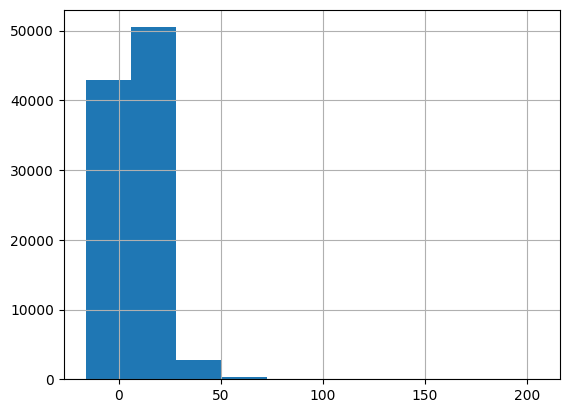

In [ ]:
order_dataset_df.delivery_time.hist()

In [ ]:
customer_dataset_df.groupby(by='status').customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

##**Explore customer_dataset_df dan order_dataset_df**

In [ ]:
customer_order_df = pd.merge(left=customer_dataset_df,
                             right=order_dataset_df,
                             how='left',
                             left_on='customer_id',
                             right_on='customer_id'
                             )
customer_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [ ]:
customer_order_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [ ]:
customer_order_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [ ]:
customer_order_df.groupby(by='customer_zip_code_prefix').order_id.nunique().sort_values(ascending=False).head(10)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64

In [ ]:
customer_order_df.groupby(by='order_status').order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [ ]:
order_payments_reviews_df = pd.merge(left=order_payments_df,
                                     right=order_reviews_df,
                                     how='left',
                                     left_on='order_id',
                                     right_on='order_id'
                                     )
order_payments_reviews_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comments,no comments,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comments,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comments,no comments,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comments,no comments,2017-12-21,2017-12-22 01:10:39
5,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,d4f36356231f2e8a28c0209df9181c29,5.0,no comments,no comments,2018-06-02,2018-06-05 15:19:55
6,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12,d9a5d41bc78d0f565a7b8ac13585e9a9,5.0,10,Muito bom!!\r\n,2018-05-15,2018-05-15 22:41:43
7,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16,35f54313f077af011b5e3a8f0dafb9d7,5.0,no comments,Fiquei muito satisfeita chegou bom rápido!,2017-07-04,2017-07-05 00:12:17
8,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84,1e23005084e0ca486cb6be7f343ab1ef,4.0,no comments,no comments,2017-06-24,2017-06-27 11:04:19
9,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09,59398fe630bce3bce7dd6faf226a3d2f,5.0,Muito bom,Gostei,2018-07-29,2018-07-31 18:50:06


In [ ]:
order_payments_reviews_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [ ]:
order_payments_reviews_df.groupby(by='payment_value').order_id.nunique().sort_values(ascending=False).head(10)

payment_value
50.00     293
77.57     250
100.00    249
35.00     165
73.34     160
20.00     149
116.94    131
56.78     122
65.00     116
107.78    116
Name: order_id, dtype: int64

In [ ]:
order_payments_reviews_df.groupby(by='payment_type').agg({"order_id":"unique",
                                                          "payment_value":["min","max"]
                                                          })

order_id payment_value  \
                                                         unique           min   
payment_type                                                                    
boleto        [0573b5e23cbd798006520e1d5b4c6714, 8cd68144cdb...         11.62   
credit_card   [b81ef226f3fe1789b1e8b2acac839d17, a9810da8291...          0.01   
debit_card    [fa2ea4b6e84c1c0fc4f3a6d468c55183, cf61ad2218e...         13.38   
not_defined   [4637ca194b6387e2d538dc89b124b0ee, 00b1cb03201...          0.00   
voucher       [5cfd514482e22bc992e7693f0e3e8df7, 947e9c6bfd8...          0.00   

                        
                   max  
payment_type            
boleto         7274.88  
credit_card   13664.08  
debit_card     4445.50  
not_defined       0.00  
voucher        3184.34

In [ ]:
customers_dataset_df = pd.merge(
    left=customer_order_df,
    right=order_payments_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comments,no comments,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comments,no comments,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comments,no comments,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comments,no comments,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


##**Eksplor Order_dataset_df & sellers_dataset_df**

In [ ]:
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


In [ ]:
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:

orderitems_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_dataset_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
orderitems_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
orderitems_sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)


seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [ ]:
orderitems_sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)


seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

In [ ]:
orderitems_sellers_df.groupby(by="freight_value").seller_id.nunique().sort_values(ascending=False).head(10)


freight_value
15.10    489
18.23    385
14.10    294
11.85    285
16.79    253
15.23    251
7.39     246
16.11    240
12.79    238
7.78     230
Name: seller_id, dtype: int64

##**Eksplor product_dataset_df & product_category_df**

###Merge product_dataset_df & product_category_df

In [ ]:
product_dataset_category_df = pd.merge(
    left=product_dataset_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_dataset_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
product_dataset_category_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)


product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [ ]:
product_dataset_category_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)


product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [ ]:
product_dataset_category_df.groupby(by="product_weight_g").product_id.nunique().sort_values(ascending=False).head(10)


product_weight_g
200.0    2084
300.0    1561
150.0    1259
400.0    1206
100.0    1188
500.0    1112
250.0    1001
600.0     957
350.0     832
700.0     748
Name: product_id, dtype: int64

In [ ]:
product_dataset_category_df.groupby(by='product_category_name_english').agg({"product_id":"unique",
                                                          "product_weight_g":["min","max"]
                                                          })

product_id  \
                                                                          unique   
product_category_name_english                                                      
agro_industry_and_commerce     [07f01b6fcacc1b187a71e5074199db2d, 613d093272c...   
air_conditioning               [f17b05cc8a7651896df8c30884200e9a, 4a96de21ccf...   
art                            [3aa071139cb16b67ca9e5dea641aaa2f, cbaff83e2c0...   
arts_and_craftmanship          [43506d2b6b5e0535079f88c7dc51c4de, 189d6b9a380...   
audio                          [ed9b924bdbd0fd22c60aba6dddfbb6e5, 92ee7c820f6...   
...                                                                          ...   
stationery                     [1065dbb6b0bf03daaedab1236979e296, 4e04ffb7dd3...   
tablets_printing_image         [2eb9b2ef7c1da3c7b99702452ea4729f, 34dabb8af33...   
telephony                      [92bf5d2084dfbcb57d9db7838bac5cd0, 64c8f1a52b4...   
toys                           [8c92109888e8cdf9d66dc7e463025574, 1c6fb703c62...   
watches_gifts                  [3e9b58f1436820c248d3f98d7229bb14, be1be330cf3...   

                              product_weight_g           
                                           min      max  
product_category_name_english                            
agro_industry_and_commerce                50.0  30000.0  
air_conditioning                         100.0  23300.0  
art                                      100.0  15400.0  
arts_and_craftmanship                    100.0   6850.0  
audio                                    100.0   6663.0  
...                                        ...      ...  
stationery                                 2.0  29000.0  
tablets_printing_image                   100.0   1100.0  
telephony                                 50.0   8100.0  
toys                                      50.0  30000.0  
watches_gifts                             50.0  22175.0  

[71 rows x 3 columns]

###Merge orderitems_sellers_df & product_dataset_category_df

In [ ]:
ospd_df = pd.merge(
    left=product_dataset_category_df,
    right=orderitems_sellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
ospd_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [ ]:
ospd_df.sort_values(by="price", ascending=False)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [ ]:
ospd_df.groupby(by="product_category_name_english").agg({
    "order_id": "unique",
    "price":  ["min", "max"]})

order_id  \
                                                                          unique   
product_category_name_english                                                      
agro_industry_and_commerce     [21577126c19bf11a0b91592e5844ba78, 8c49b483673...   
air_conditioning               [9edbb64717f62b49b516e6d66f31edc0, 20d5211ad92...   
art                            [5236307716393b7114b53ee991f36956, c73b0385112...   
arts_and_craftmanship          [08322b6d209359f491acb1e5f89cb371, 99496f27b38...   
audio                          [4a14b4a65e7946cfa68ad61507ad3023, 9b1d71b20ed...   
...                                                                          ...   
stationery                     [04d7676ae07d3a61604185998b0d51d9, 979413f37ff...   
tablets_printing_image         [21c9e1884faf91f5fc65224d92b2ef83, 3b7a87febfa...   
telephony                      [cfdb617e22dcebc94710036f7692969b, 3544a45e2fd...   
toys                           [2279e81e4cfd1c590ccbc2e0b9c1b90b, 2b3914c5dff...   
watches_gifts                  [1ea0993dbee417148367f2243ce047ec, 9dbf9846357...   

                               price           
                                 min      max  
product_category_name_english                  
agro_industry_and_commerce     12.99  2990.00  
air_conditioning               10.90  1599.00  
art                             3.50  6499.00  
arts_and_craftmanship           9.80   289.49  
audio                          14.90   598.99  
...                              ...      ...  
stationery                      2.29  1693.00  
tablets_printing_image         14.90   889.99  
telephony                       5.00  2428.00  
toys                            4.90  1699.99  
watches_gifts                   8.99  3999.90  

[71 rows x 3 columns]

##**Eksplor geolocation_df**

In [ ]:
geolokasi_df.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
268261,12060,-23.020753,-45.562962,taubaté,SP
784651,71530,-15.756729,-47.843391,brasília,DF
54222,3382,-23.580568,-46.530452,sao paulo,SP
973125,95780,-29.695280,-51.478040,montenegro,RS
798242,74495,-16.683636,-49.387040,goiania,GO
129811,5402,-23.565058,-46.679756,são paulo,SP
143838,5894,-23.650018,-46.791598,sao paulo,SP
411954,20541,-22.928859,-43.256392,rio de janeiro,RJ
968752,95590,-29.991495,-50.137311,tramandai,RS
380590,18035,-23.500084,-47.461416,sorocaba,SP


In [ ]:
geolokasi_df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [ ]:
def p_string(column):
    column_s = ' '.join(column.split())
    return unidecode.unidecode(column_s.lower())

In [ ]:
geolokasi_df['geolocation_city'] = geolokasi_df['geolocation_city'].apply(p_string)

In [ ]:
geolokasi_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)


geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [ ]:
geolokasi_df[geolokasi_df['geolocation_zip_code_prefix'] == 24220].head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


##**Eksplor Semua Data**

In [ ]:
data_besar = pd.merge(
    left=customers_dataset_df,
    right=ospd_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
data_besar.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [ ]:
data_besar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

In [ ]:
data_besar.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [ ]:
data_besar.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [ ]:
data_besar.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [ ]:
data_besar.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

In [ ]:
##Konversi data ke CSV
data_besar.to_csv('data_besar.csv',index=False)
data_besar.to_csv('/content/drive/MyDrive/Asset.csv')
geolokasi_df.to_csv('geolokasi.csv',index=False)
geolokasi_df.to_csv('/content/drive/MyDrive/Asset.csv')

#**Visualisasi Data & Explanatory Analysis**

In [ ]:
data_besar.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


##**Pertanyaan 1: dimana letak bagian negara dengan jumlah customer terbanyak?**

In [ ]:
negara_geolokasi = geolokasi_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
negara_geolokasi[negara_geolokasi['count']>= 2].shape
negara_banyak_cust = geolokasi_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)


In [ ]:
negara_sort = geolokasi_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
negara_sort = negara_sort.merge(negara_banyak_cust,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
pelanggan_banyak = customers_dataset_df = customers_dataset_df.merge(negara_sort,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')


In [ ]:
pelanggan_banyak.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,4.0,no comments,no comments,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.50207,-47.396822
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,Active,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,...,5.0,super recomendo,no comments,2018-06-22,2018-06-26 19:17:40,14409,franca,SP,-20.50207,-47.396822
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,Active,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,...,5.0,no comments,no comments,2017-09-19,2017-09-20 03:47:39,14409,franca,SP,-20.50207,-47.396822
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,Active,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,...,5.0,no comments,no comments,2018-03-29,2018-04-11 20:07:14,14409,franca,SP,-20.50207,-47.396822
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,Active,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,...,5.0,no comments,no comments,2018-08-04,2018-08-04 23:20:25,14409,franca,SP,-20.50207,-47.396822


In [ ]:

def map_negara(input_data):
    mapss_negara = mimg.imread(urllib.request.urlopen('https://i.pinimg.com/564x/81/6f/f6/816ff6ea17f5b4f5bb7c13d1082da74e.jpg'),'jpg')
    ax = input_data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='red')
    plt.axis('off')
    plt.imshow(mapss_negara, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()


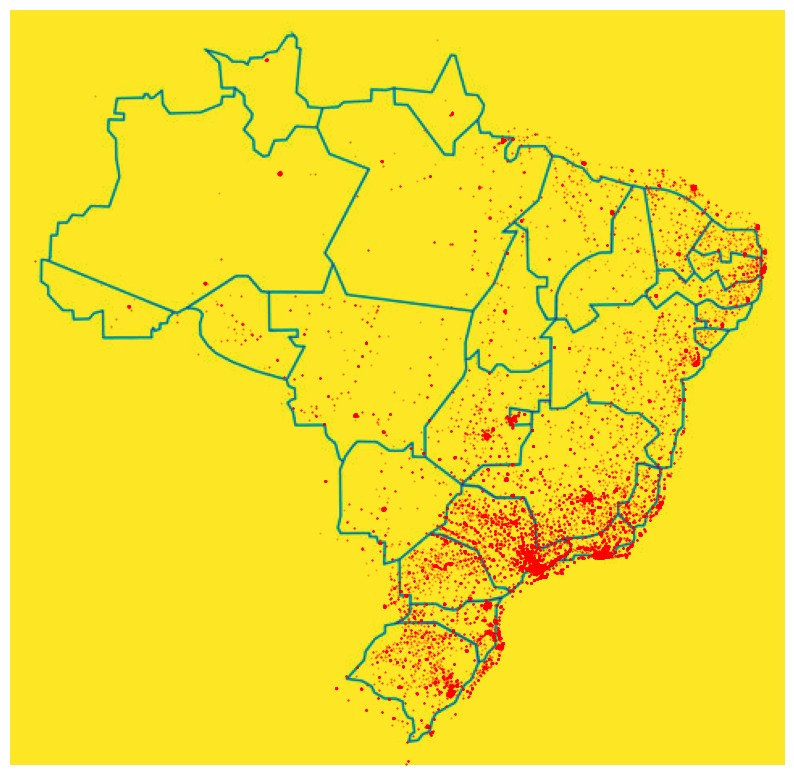

In [ ]:
map_negara(pelanggan_banyak.drop_duplicates(subset='customer_unique_id'))

###Berdasarkan map tersebut, customer mayoritas berasal dari bagian selatan dan tenggara negara Brazil

##**Pertanyaan 2: Bagaimana kinerja sales dari E-commerce tersebut?**

In [ ]:
performa_df = data_besar.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
performa_df.index = performa_df.index.strftime('%B')
performa_df = performa_df.reset_index()
performa_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
performa_df.head()


,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760


In [ ]:
performa_df = performa_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')


In [ ]:
performa_df.head(10)

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176
23,August,6620
17,February,6706
19,April,6778
20,May,7066
16,January,7187


In [ ]:
performa_df.sort_values(by='order_count')


,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176
23,August,6620
17,February,6706
19,April,6778
20,May,7066
16,January,7187


In [ ]:
performa_bulanan = {
   "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

performa_df["month_numeric"] = performa_df["order_approved_at"].map(performa_bulanan)
performa_df = performa_df.sort_values("month_numeric")
performa_df = performa_df.drop("month_numeric", axis=1)

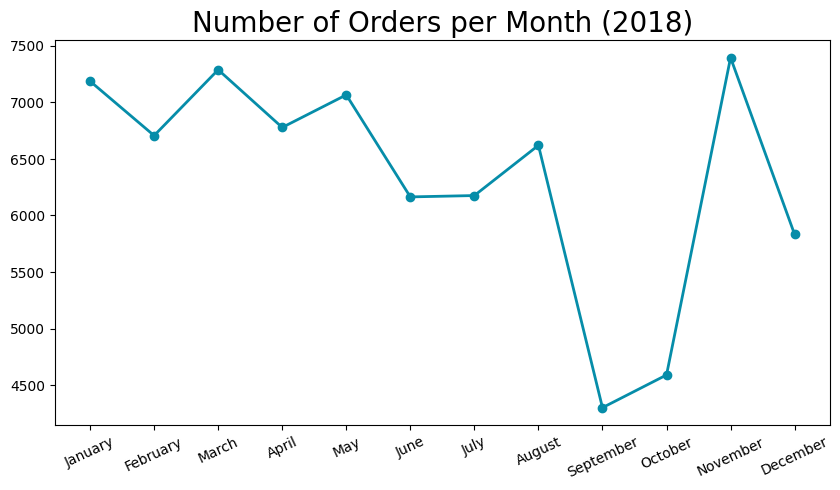

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    performa_df["order_approved_at"],
    performa_df["order_count"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

###Berdasarkan line chart di atas, bahwa kinerja sales e-commerce tersebut mulai menandakan pola downtrend dari bulan Januari. Puncak penurunan terbesar pada September tetapi berhasil rebound pada November-Desember

##**Bagaimana review customer terhadap kinerja pelayanan e-commerce tersebut?**

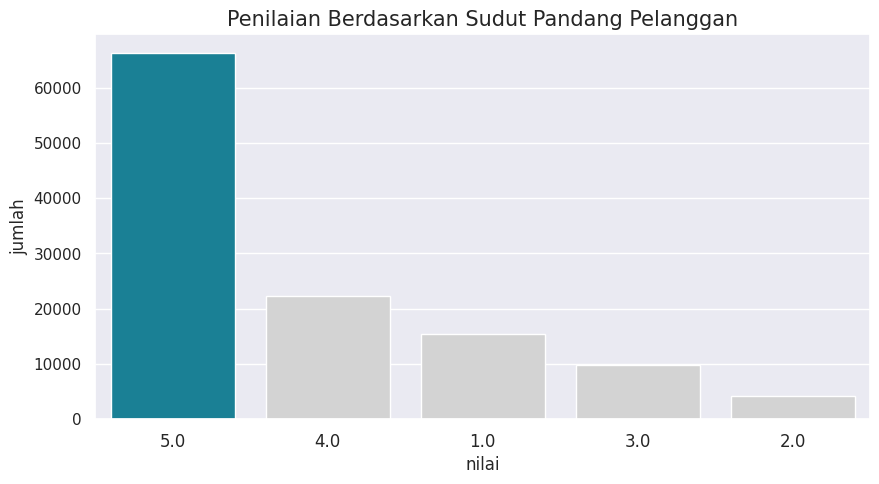

In [ ]:
nilai_kinerja = data_besar['review_score'].value_counts().sort_values(ascending=False)

nilai = nilai_kinerja.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=nilai_kinerja.index,
            y=nilai_kinerja.values,
            order=nilai_kinerja.index,
            palette=["#068DA9" if score == nilai else "#D3D3D3" for score in nilai_kinerja.index]
            )

plt.title("Penilaian Berdasarkan Sudut Pandang Pelanggan", fontsize=15)
plt.xlabel("nilai")
plt.ylabel("jumlah")
plt.xticks(fontsize=12)
plt.show()

##Berdasarkan bar chart tersebut bahwa e-commerce ini didominasi oleh nilai 5 out of 5 dari customer

#**Conslusion**

###**Pertanyaan 1: Dimana letak bagian negara dengan jumlah customer terbanyak?**

---
Berdasarkan hasil mapping tersebut, diperoleh kesimpulan bahwa pangsa pasar terbesar dari e-commerce tersebut berada di Brazil bagian tenggara dan selatan sehingga e-commerce dapat mulai meningkatkan aktivitas marketing di beberapa bagian seperti timur laut dan timur karena berpotensi untuk menjadi bagian pangsa pasar e-commerce tersebut


###**Pertanyaan 2: Bagaimana kinerja sales dari E-commerce tersebut?**

---
Berdasarkan hasil line chart tersebut, diperoleh kesimpulan bahwa kinerja sales dari e-commerce tersebut dari Januari mulai membentuk pola downtrend dan puncak penurunan pada bulan September dan kembali bounce-back pada bulan November. Penurunan tersebut tentunya dipengaruhi oleh berbagai faktor dan kemungkinan seperti kenaikan suku bunga acuan yang cenderung merugikan perusahaan e-commerce atau akibat kenaikan harga komoditas yang memicu kenaikan harga barang.


###**Pertanyaan 3: Bagaimana review customer terhadap kinerja pelayanan e-commerce tersebut?**

---
Berdasrkan barchart tersebut dapat ditarik kesimpulan bahwa e-commerce tersebut didominasi oleh penilaian memuaskan oleh para pelanggannya. Hal ini artinya e-commerce tersebut mengutamakan kepuasan pelanggan dalam menjalankan bisnisnya


#**Peroject ini menerapkan analisis geonanalysis yang diimplementasikan pada pertanyaan bisnis nomor 1 dan**